# Suits

**Suits** is an American legal drama television series created and written by *Aaron Korsh*. The show premiered on USA Network in June 2011 and ran for nine seasons, until September 2019. The series is set at a fictional law firm in New York City and follows talented college dropout Mike Ross, who starts working as a law associate for Harvey Specter, despite never having attended law school (he faked going to college). The show focuses on Harvey and Mike managing to close cases while maintaining Mike's secret.

<img src="https://fwcdn.pl/fpo/57/26/585726/7856884.3.jpg">

Downloading statistics from Wikipedia

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_Suits_episodes'
html = requests.get(url).content
df_list = pd.read_html(html)
df_views = pd.concat([df for df in df_list if 'U.S. viewers(millions)' in df.columns])
df_views

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Original air date [126]
0,1.0,1.0,"""Pilot""",Kevin Bray,Aaron Korsh,"June 23, 2011",4.64[3],NaN
1,2.0,2.0,"""Errors and Omissions""",John Scott,Sean Jablonski,"June 30, 2011",3.89[4],NaN
2,3.0,3.0,"""Inside Track""",Kevin Bray,Aaron Korsh,"July 7, 2011",4.53[5],NaN
3,4.0,4.0,"""Dirty Little Secrets""",Dennie Gordon,Jon Cowan,"July 14, 2011",4.38[6],NaN
4,5.0,5.0,"""Bail Out""",Kate Woods,Ethan Drogin,"July 21, 2011",4.38[7],NaN
...,...,...,...,...,...,...,...,...
6,131.0,7.0,"""Scenic Route""",Emile Levisetti,Garrett Schabb,NaN,1.07[133],"September 4, 2019"
7,132.0,8.0,"""Prisoner's Dilemma""",Julian Holmes,Ethan Drogin,NaN,0.97[134],"September 11, 2019"
8,133.0,9.0,"""Thunder Away""",Robert Duncan McNeill,Genevieve Sparling,NaN,0.96[135],"September 18, 2019"
9,134.0,10.0,"""One Last Con""",Aaron Korsh,Aaron Korsh,NaN,0.86[136],"September 25, 2019"


<AxesSubplot:>

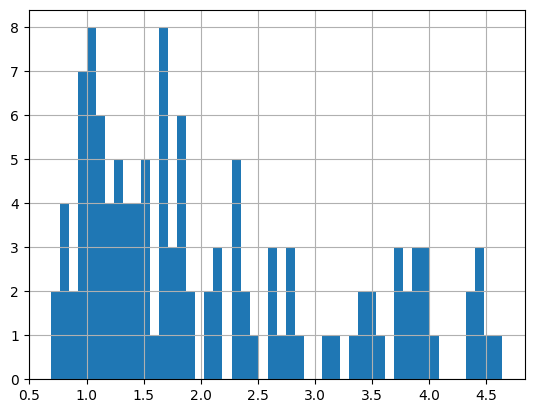

In [14]:
df_views['views'] = df_views['U.S. viewers(millions)'].apply(lambda x: float(x.split('[')[0]))
df_views['views'].hist(bins=50)

Most episodes have gathered about 0.5 to 2 million views.

<AxesSubplot:>

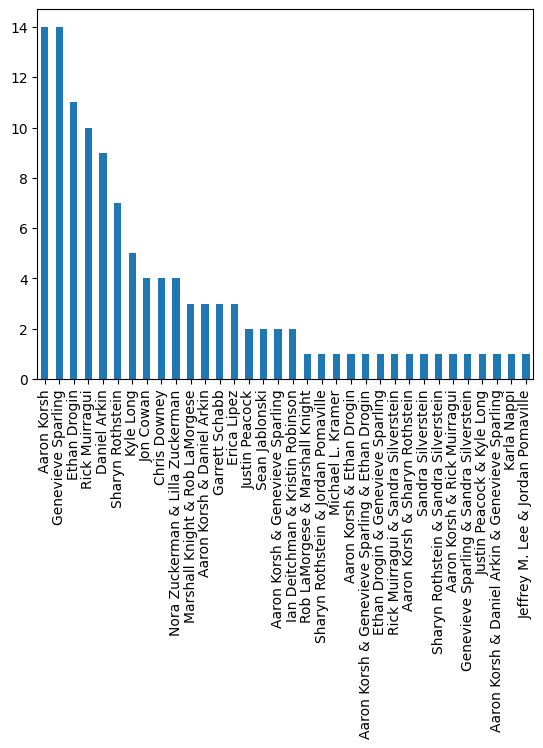

In [19]:
df_views['Written by'].value_counts().plot(kind='bar')

There was a draw between most episodes (14) written between  *Aaron Korsh* and *Genevieve Sparling*.

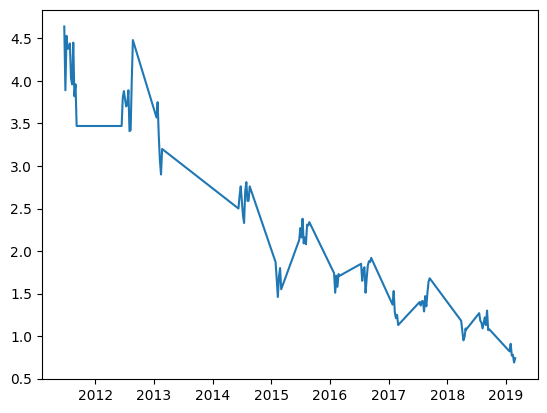

In [26]:
df_views['date'] = pd.to_datetime(df_views['Original air date'])
plt.plot(df_views['date'], df_views['views'])

The number of views has been decreasing over time. The first season was the most popular. Usually, the first episodes of the season have the highest number of views.

In [28]:
df_views

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Original air date [126],views,date
0,1.0,1.0,"""Pilot""",Kevin Bray,Aaron Korsh,"June 23, 2011",4.64[3],NaN,4.64,2011-06-23
1,2.0,2.0,"""Errors and Omissions""",John Scott,Sean Jablonski,"June 30, 2011",3.89[4],NaN,3.89,2011-06-30
2,3.0,3.0,"""Inside Track""",Kevin Bray,Aaron Korsh,"July 7, 2011",4.53[5],NaN,4.53,2011-07-07
3,4.0,4.0,"""Dirty Little Secrets""",Dennie Gordon,Jon Cowan,"July 14, 2011",4.38[6],NaN,4.38,2011-07-14
4,5.0,5.0,"""Bail Out""",Kate Woods,Ethan Drogin,"July 21, 2011",4.38[7],NaN,4.38,2011-07-21
...,...,...,...,...,...,...,...,...,...,...
6,131.0,7.0,"""Scenic Route""",Emile Levisetti,Garrett Schabb,NaN,1.07[133],"September 4, 2019",1.07,NaT
7,132.0,8.0,"""Prisoner's Dilemma""",Julian Holmes,Ethan Drogin,NaN,0.97[134],"September 11, 2019",0.97,NaT
8,133.0,9.0,"""Thunder Away""",Robert Duncan McNeill,Genevieve Sparling,NaN,0.96[135],"September 18, 2019",0.96,NaT
9,134.0,10.0,"""One Last Con""",Aaron Korsh,Aaron Korsh,NaN,0.86[136],"September 25, 2019",0.86,NaT


In [38]:
df_views['season'] = np.where(df_views['No. inseason'] - df_views['No. inseason'].shift(1).fillna(0) != 1, 1, 0).cumsum() + 1

<AxesSubplot:xlabel='season'>

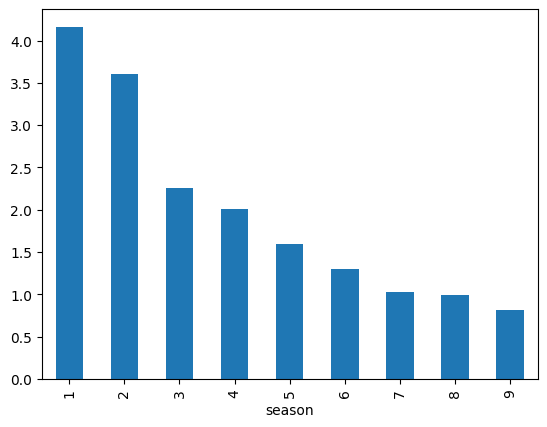

In [39]:
df_views.groupby('season')['views'].mean().plot(kind='bar')

The first season was the most popular, with an average of 4.5 million views per episode. The following seasons had an average of 3.7 million views. The largest drop in the number of views was between the second and third seasons - approximately 1.5 million views less per episode.